In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data in dataframe

In [2]:
main_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
main_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
main_df.shape

(1460, 81)

In [8]:
test_df.shape

(1459, 80)

In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
main_df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

# Check Heatmap

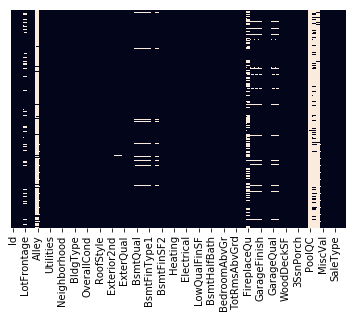

In [11]:
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False)

# Fill in Missing Values

In [15]:
main_df['LotFrontage'] = main_df['LotFrontage'].fillna(main_df['LotFrontage'].mean())

In [16]:
main_df['BsmtCond'] = main_df['BsmtCond'].fillna(main_df['BsmtCond'].mode()[0])
main_df['BsmtQual'] = main_df['BsmtQual'].fillna(main_df['BsmtQual'].mode()[0])
main_df['FireplaceQu'] = main_df['FireplaceQu'].fillna(main_df['FireplaceQu'].mode()[0])
main_df['GarageType'] = main_df['GarageType'].fillna(main_df['GarageType'].mode()[0])
main_df['GarageFinish'] = main_df['GarageFinish'].fillna(main_df['GarageFinish'].mode()[0])
main_df['GarageQual'] = main_df['GarageQual'].fillna(main_df['GarageQual'].mode()[0])
main_df['GarageCond'] = main_df['GarageCond'].fillna(main_df['GarageCond'].mode()[0])

# Drop Least Impacting Features

In [17]:
main_df.drop(['Alley'],axis=1,inplace=True)

In [21]:
main_df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [23]:
main_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

KeyError: "['PoolQC' 'Fence' 'MiscFeature'] not found in axis"

In [25]:
main_df.drop(['Id'],axis=1,inplace=True)

In [26]:
main_df.shape

(1460, 75)

In [27]:
main_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [28]:
main_df['MasVnrType'] = main_df['MasVnrType'].fillna(main_df['MasVnrType'].mode()[0])
main_df['MasVnrArea'] = main_df['MasVnrArea'].fillna(main_df['MasVnrArea'].mode()[0])

# New heatmap

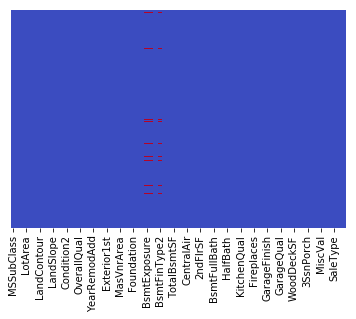

In [29]:
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [30]:
main_df['BsmtExposure'] = main_df['BsmtExposure'].fillna(main_df['BsmtExposure'].mode()[0])

In [32]:
main_df['BsmtFinType2'] = main_df['BsmtFinType2'].fillna(main_df['BsmtFinType2'].mode()[0])

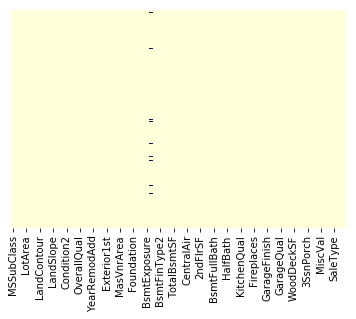

In [33]:
sns.heatmap(main_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [34]:
main_df.dropna(inplace=True)

In [35]:
main_df.shape

(1422, 75)

In [36]:
main_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Handle Categorical Features

In [37]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition2',
         'BldgType','Condition1','HouseStyle','SaleType', 'SaleCondition','ExterCond', 'ExterQual','Foundation',
         'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl','Exterior1st',
         'Exterior2nd','MasVnrType','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [38]:
len(columns)

39

In [39]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:  
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:   
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [41]:
df = main_df.copy()

# Handle Test Data

In [42]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [44]:
# Fill Missing Values

test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [45]:
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])

In [46]:
# Drop irrevalent features

test_df.drop(['Alley'],axis=1,inplace=True)

In [47]:
test_df.shape

(1459, 79)

In [48]:
test_df['BsmtCond'] = test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual'] = test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType'] = test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish'] = test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual'] = test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond'] = test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

In [49]:
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [50]:
test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [51]:
test_df.drop(['Id'],axis=1,inplace=True)

In [52]:
test_df.shape

(1459, 74)

In [53]:
test_df['MasVnrType'] = test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])

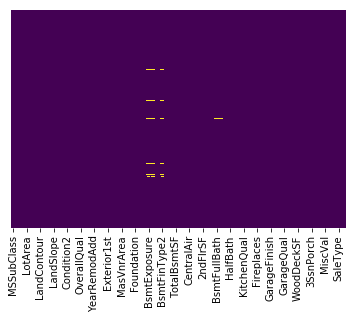

In [54]:
# Heatmap

sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])

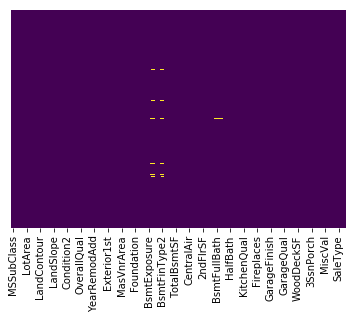

In [56]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])

In [58]:
test_df.loc[:, test_df.isnull().any()].head()

,Utilities,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,AllPub,VinylSd,VinylSd,Rec,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1,AllPub,Wd Sdng,Wd Sdng,ALQ,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
2,AllPub,VinylSd,VinylSd,GLQ,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
3,AllPub,VinylSd,VinylSd,GLQ,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
4,AllPub,HdBoard,HdBoard,ALQ,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD


In [59]:
test_df['Utilities'] = test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st'] = test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd'] = test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1'] = test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2'] = test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF'] = test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF'] = test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath'] = test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional'] = test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea'] = test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType'] = test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [60]:
test_df.shape

(1459, 74)

In [61]:
test_df.to_csv('data/formulated_test.csv',index=False)

# Combine Test Data

In [62]:
ftest_df = pd.read_csv('data/formulated_test.csv')

In [63]:
ftest_df.shape

(1459, 74)

In [64]:
ftest_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [65]:
final_df = pd.concat([main_df,ftest_df],axis=0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [66]:
final_df.shape

(2881, 75)

In [67]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [68]:
final_df.shape

(2881, 235)

In [69]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [70]:
final_df.shape

(2881, 175)

In [71]:
final_df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [72]:
df_Train = final_df.iloc[:1422,:]
df_Test = final_df.iloc[1422:,:]

In [73]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
df_Test.shape

(1459, 174)

In [75]:
X_train = df_Train.drop(['SalePrice'],axis=1)
y_train = df_Train['SalePrice']

In [78]:
!pip install xgboost

  Using cached https://files.pythonhosted.org/packages/96/84/4e2cae6247f397f83d8adc5c2a2a0c5d7d790a14a4c7400ff6574586f589/xgboost-0.90.tar.gz
  Created wheel for xgboost: filename=xgboost-0.90-cp36-cp36m-macosx_10_7_x86_64.whl size=1696848 sha256=ececd6ebe374ae9ae2c4e7778a1a31ddee8c8632814b1162daa78c5118b242b8
  Stored in directory: /Users/jayantparida/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [79]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:44:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Save Model

In [80]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [81]:
y_pred = classifier.predict(df_Test)

In [82]:
y_pred

array([120400.42, 158911.88, 180999.78, ..., 173712.56, 122531.15,
       242785.78], dtype=float32)

# Create sample submission file

In [85]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('data/sample_submission.csv')
datasets = pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('data/sample_submission.csv',index=False)